In [3]:
import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as pl
from tqdm import tqdm_notebook

<u>cape_cod</u>

* Latitude:41.795275°
* Longitude:-70.368343°
* assumed cruising speed for all species: 100mi/d

In [4]:
CC_LAT = 41.795275
CC_LON = -70.368343
MAX_DIST = 700 #mi
START_DATE = '1999-1-1'
END_DATE = '2014-12-31'


def distance(ref_lat_lon, df_lats, df_lons, use_miles=True):
    ref_lat, ref_lon = ref_lat_lon
    if use_miles:
        radius = 3959 # mi
    else:
        radius = 6371 # km  
    dlat = np.deg2rad(df_lats - ref_lat)
    dlon = np.deg2rad(df_lons - ref_lon)
    step1 = np.sin(dlat/2) * np.sin(dlat/2) + np.cos(np.deg2rad(ref_lat)) \
        * np.cos(np.deg2rad(df_lats)) * np.sin(dlon/2) * np.sin(dlon/2)
    step2 = 2 * np.arctan2(np.sqrt(step1), np.sqrt(1-step1))
    distance = radius * step2
    return distance

def LoadAndCompute(f_path):
    df = pd.read_pickle(f_path)
    critter = f_path.name.split('_')[0]
    print('\rProcessing Data for %s' % critter)
    df['distance'] = pd.Series(distance((CC_LAT, CC_LON), df['%s_latitude' % critter] ,
                                       df['%s_longitude' % critter]), index=df.index)
    df.loc[:,"%s_count" % critter].replace(np.NaN, 0, inplace=True)
    drop_cols = df.filter(regex=r'(latitude)|(longitude)').columns.tolist()
    df_cape_cod = df.loc[df.distance<=MAX_DIST].resample('D').sum()
    df_cape_cod.fillna(0, inplace=True)
    df_cape_cod.drop(drop_cols + ['distance'], axis=1, inplace=True)
    idx = pd.DatetimeIndex(start=START_DATE, end=END_DATE, freq='D')
    df_cape_cod = df_cape_cod.reindex(idx, fill_value=0)
    df_cape_cod['%s_roll_W_sum' % critter] = \
        pd.Series(df_cape_cod['%s_count' % critter].rolling(7,
                                                            min_periods=1).sum().fillna(0),
                  index=df_cape_cod.index)
    return df_cape_cod


def main(pkl_generator):
    dfAgg_Cape_Cod = pd.DataFrame()
    for file_path in tqdm_notebook(pkl_generator):
        df_cc_ = LoadAndCompute(file_path)
        if dfAgg_Cape_Cod.empty:
            dfAgg_Cape_Cod = df_cc_
        else:
            dfAgg_Cape_Cod = dfAgg_Cape_Cod.merge(df_cc_, how='outer',
                                                  left_index=True, right_index=True)
    dfAgg_Cape_Cod['Sum_Counts'] = pd.Series(dfAgg_Cape_Cod.iloc[:,::2].sum(axis=1),
                                          index=dfAgg_Cape_Cod.index)
    dfAgg_Cape_Cod['Sum_W_Rolls'] = pd.Series(dfAgg_Cape_Cod.iloc[:,1:-1:2].sum(axis=1),
                                             index=dfAgg_Cape_Cod.index)
    return dfAgg_Cape_Cod

In [5]:
% matplotlib inline

In [6]:
home = pathlib.Path.home()

In [7]:
pkldir = home / 'DEV-ALL/beaching/PklJar/Census'

In [8]:
df_cape_cod_all_spp = main(pkldir.glob('*.pkl'))

Processing Data for Stene
Processing Data for Gramp
Processing Data for Delph
Processing Data for Lagen
Processing Data for Tursi
Processing Data for Globi



In [10]:
df_cape_cod_all_spp.head(20)

,Stene_count,Stene_roll_W_sum,Gramp_count,Gramp_roll_W_sum,Delph_count,Delph_roll_W_sum,Lagen_count,Lagen_roll_W_sum,Tursi_count,Tursi_roll_W_sum,Globi_count,Globi_roll_W_sum,Sum_Counts,Sum_W_Rolls
1999-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
1999-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1999-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,10.0,10.0,11.0
1999-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,0.0,11.0
1999-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,0.0,11.0
1999-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,0.0,11.0
1999-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,0.0,11.0
1999-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,10.0,1.0,11.0
1999-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,0.0,11.0
1999-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [14]:
'%s'% cols[i]

'Stene_count'

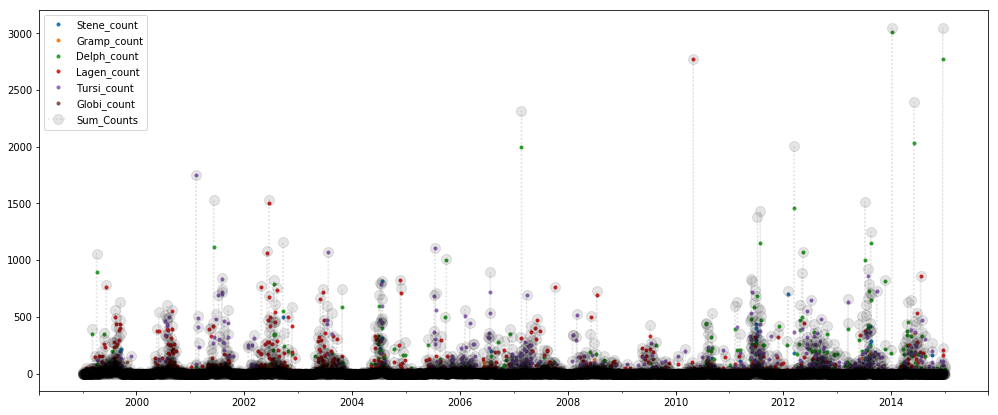

In [51]:
_, ax = pl.subplots(figsize=(17, 7))
cols = df_cape_cod_all_spp.columns.tolist()
for i in range(0,df_cape_cod_all_spp.shape[1]-2, 2):
    df_cape_cod_all_spp.plot(y=cols[i], ax=ax, style='.')
sumcol = 'Sum_Counts'
df_cape_cod_all_spp.plot(y=sumcol, style='ko:', alpha=0.1, ax=ax, markersize=10)
ax.legend();

In [28]:
np.array(idx.tolist())

array([Timestamp('1999-01-01 00:00:00', freq='D'),
       Timestamp('1999-01-02 00:00:00', freq='D'),
       Timestamp('1999-01-03 00:00:00', freq='D'), ...,
       Timestamp('2014-12-29 00:00:00', freq='D'),
       Timestamp('2014-12-30 00:00:00', freq='D'),
       Timestamp('2014-12-31 00:00:00', freq='D')], dtype=object)

In [26]:
vals.shape

(5844,)

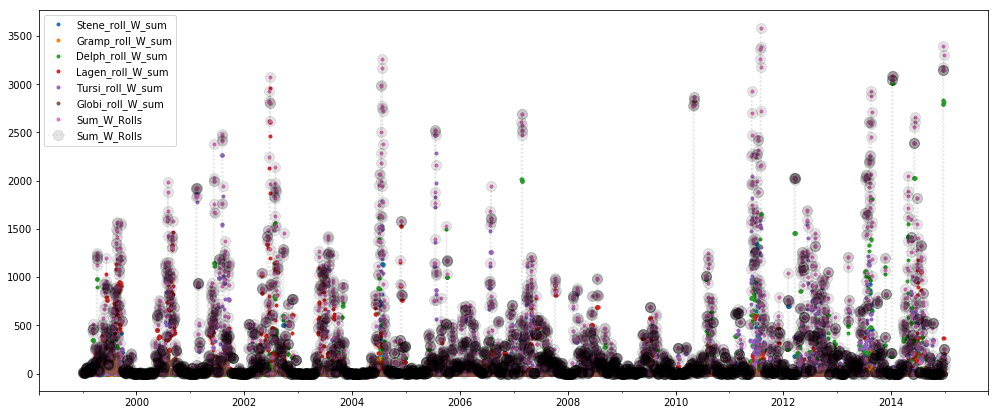

In [49]:
_, ax = pl.subplots(figsize=(17, 7))
cols = df_cape_cod_all_spp.columns.tolist()
for i in range(1,df_cape_cod_all_spp.shape[1], 2):
    df_cape_cod_all_spp.plot(y=cols[i], ax=ax, style='.')
sumcol = 'Sum_W_Rolls'
df_cape_cod_all_spp.plot(y=sumcol, style='ko:', alpha=0.1, ax=ax, markersize=10)
ax.legend();

In [52]:
df_cape_cod_all_spp.to_pickle('../PklJar/dfCensus_Cape_Cod_6spp.pkl')